#NEURAL NETWORK 
NOTE: All models here use L2 regularisation with penalty = 0.0001.
First, we set up the libraries.

In [221]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 

%matplotlib inline

In [222]:
df = pd.read_csv("https://raw.githubusercontent.com/cynthiacheng1/ShroomAnalysis/main/mushrooms.csv")

In [223]:
#Load the data / Preprocessing

#Features
data = df.drop("class",axis=1)
filters = ["gill-attachment","veil-type","veil-color","ring-number"] #features to be excluded, found through constant and quasi-constant filtering
data = data.drop(columns=filters)
print(data.head)

def to_digit(i):
    if i in chars:
        return chars[i]
    else:
        chars[i] = len(chars)+1
        return chars[i]

features = list(data.columns)
for idx in features:
    chars = {}
    data[idx] = data[idx].map(to_digit)

print(data.head)

#Target
target = df["class"]
target = target.replace("e",0)
target = target.replace("p",1)
print (target.head)


<bound method NDFrame.head of      cap-shape cap-surface cap-color  ... spore-print-color population habitat
0            x           s         n  ...                 k          s       u
1            x           s         y  ...                 n          n       g
2            b           s         w  ...                 n          n       m
3            x           y         w  ...                 k          s       u
4            x           s         g  ...                 n          a       g
...        ...         ...       ...  ...               ...        ...     ...
8119         k           s         n  ...                 b          c       l
8120         x           s         n  ...                 b          v       l
8121         f           s         n  ...                 b          c       l
8122         k           y         n  ...                 w          v       l
8123         x           s         n  ...                 o          c       l

[8124 rows x 18 colum

# Data Preprocessing

In [224]:

X= data.to_numpy()
y = target.to_numpy()

#70% train, 30%test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30,random_state=1)

#scaling x 
scaler = preprocessing.StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Sigmoid activation
We are goin to start with one 20-cell hidden layer, with the stoichastic gradient descent solver.

In [225]:
sig_nn = MLPClassifier(hidden_layer_sizes=(20,),activation="logistic",solver="adam",max_iter=1000)
sig_nn.fit(X_train,y_train)

y_pred = sig_nn.predict(X_test)
sig_nn_score = sig_nn.score(X_test,y_test)
y_pred_proba = sig_nn.predict_proba(X_test)


In [226]:
print(sig_nn_score)
#print("w: ",sig_nn.coefs_)
#print("b: ",sig_nn.intercepts_)

0.9995898277276456


Now we know logistic with 1 20-cell hidden layer works, let's see how low we can lower the cell count while maintaining high acc.

In [227]:
for cell in range (1,21):
    sig_nn = MLPClassifier(hidden_layer_sizes=(cell,),activation="logistic",solver="adam",max_iter=1000)
    sig_nn.fit(X_train,y_train)

    print(cell,"cells, acc=",sig_nn.score(X_test,y_test))

1 cells, acc= 0.9835931091058244
2 cells, acc= 0.9893355209187858
3 cells, acc= 0.9942575881870386
4 cells, acc= 0.9950779327317474
5 cells, acc= 0.9938474159146842
6 cells, acc= 0.9991796554552912
7 cells, acc= 1.0
8 cells, acc= 1.0
9 cells, acc= 0.9991796554552912
10 cells, acc= 0.9991796554552912
11 cells, acc= 1.0
12 cells, acc= 0.9995898277276456
13 cells, acc= 0.9995898277276456
14 cells, acc= 1.0
15 cells, acc= 0.9995898277276456
16 cells, acc= 1.0
17 cells, acc= 1.0
18 cells, acc= 1.0
19 cells, acc= 1.0
20 cells, acc= 1.0


Just 5 cells work!

In [228]:
sig_nn = MLPClassifier(hidden_layer_sizes=(5,),activation="logistic",solver="adam",max_iter=1000)
sig_nn.fit(X_train,y_train)

y_pred = sig_nn.predict(X_test)
sig_nn_score = sig_nn.score(X_test,y_test)
y_pred_proba = sig_nn.predict_proba(X_test)

print(sig_nn_score)
#print("w: ",sig_nn.coefs_)
#print("b: ",sig_nn.intercepts_)

1.0


# TanH Activation

Same thing, we start with one 20-node layer.

In [229]:
tanh_nn = MLPClassifier(hidden_layer_sizes=(20,),activation="tanh",solver="adam",max_iter=1000)
tanh_nn.fit(X_train,y_train)

y_pred = tanh_nn.predict(X_test)
tanh_score = tanh_nn.score(X_test,y_test)
y_pred_proba = tanh_nn.predict_proba(X_test)


In [230]:
print(tanh_score)
#print("w: ",tanh_nn.coefs_)
#print("b: ",tanh_nn.intercepts_)

0.9995898277276456


TanH also works as we imagined, now let's see if we can lower that cell count.

In [231]:
for cell in range (1,21):
    #we use lbfgs because the stoichastic one does not converge before cell size 20
    tanh_nn = MLPClassifier(hidden_layer_sizes=(cell,),activation="tanh",solver="adam",max_iter=1000)
    tanh_nn.fit(X_train,y_train)

    print(cell,"cells, acc=",tanh_nn.score(X_test,y_test))

1 cells, acc= 0.9835931091058244
2 cells, acc= 0.9848236259228876
3 cells, acc= 0.9995898277276456
4 cells, acc= 1.0
5 cells, acc= 1.0
6 cells, acc= 0.9995898277276456
7 cells, acc= 0.9979491386382281
8 cells, acc= 1.0
9 cells, acc= 1.0
10 cells, acc= 0.9995898277276456
11 cells, acc= 0.9995898277276456
12 cells, acc= 1.0
13 cells, acc= 0.9995898277276456
14 cells, acc= 1.0
15 cells, acc= 0.9995898277276456
16 cells, acc= 1.0
17 cells, acc= 1.0
18 cells, acc= 1.0
19 cells, acc= 1.0
20 cells, acc= 1.0


Same thing here, just 5 cells work!

In [232]:
tanh_nn = MLPClassifier(hidden_layer_sizes=(5,),activation="tanh",solver="adam",max_iter=1000)
tanh_nn.fit(X_train,y_train)

y_pred = tanh_nn.predict(X_test)
tanh_nn_score = tanh_nn.score(X_test,y_test)
y_pred_proba = tanh_nn.predict_proba(X_test)

print(tanh_nn_score)
#print("w: ",tanh_nn.coefs_)
#print("b: ",tanh_nn.intercepts_)

1.0


# Finally, the ReLu Activation 

Same as before <3

In [233]:
relu_nn = MLPClassifier(hidden_layer_sizes=(20,),activation="relu",solver="adam",max_iter=1000)
relu_nn.fit(X_train,y_train)

y_pred = relu_nn.predict(X_test)
relu_score = relu_nn.score(X_test,y_test)
y_pred_proba = relu_nn.predict_proba(X_test)


In [234]:
print(relu_score)
#print("w: ",relu_nn.coefs_)
#print("b: ",relu_nn.intercepts_)

0.9995898277276456


Now we test for least nodes

In [249]:
for cell in range (1,21):
    #we use lbfgs because the stoichastic one does not converge before cell size 20
    relu_nn = MLPClassifier(hidden_layer_sizes=(cell,),activation="relu",solver="adam",max_iter=1000)
    relu_nn.fit(X_train,y_train)

    print(cell,"cells, acc=",relu_nn.score(X_test,y_test))

1 cells, acc= 0.98318293683347
2 cells, acc= 0.98318293683347
3 cells, acc= 0.9864643150123051
4 cells, acc= 0.9991796554552912
5 cells, acc= 1.0
6 cells, acc= 1.0
7 cells, acc= 0.9995898277276456
8 cells, acc= 0.9995898277276456
9 cells, acc= 0.9987694831829368
10 cells, acc= 1.0
11 cells, acc= 0.9995898277276456
12 cells, acc= 0.9995898277276456
13 cells, acc= 0.9991796554552912
14 cells, acc= 1.0
15 cells, acc= 0.9995898277276456
16 cells, acc= 1.0
17 cells, acc= 1.0
18 cells, acc= 0.9995898277276456
19 cells, acc= 0.9991796554552912
20 cells, acc= 0.9995898277276456


6 nodes work.

Something worth noting is that more nodes does not neccessarily mean a higher accuracy. 

In [250]:
relu_nn = MLPClassifier(hidden_layer_sizes=(5,),activation="relu",solver="adam",max_iter=1000)
relu_nn.fit(X_train,y_train)

y_pred = relu_nn.predict(X_test)
relu_nn_score = relu_nn.score(X_test,y_test)
y_pred_proba = relu_nn.predict_proba(X_test)

print(relu_nn_score)
#print("w: ",relu_nn.coefs_)
#print("b: ",relu_nn.intercepts_)

0.9885151763740772


# Feature Importance Estimation & Feature Reduction
Since our data is linearly seperable, there is not much we can do in terms of optimisation. So instead, let's see if there is any way we can figure out which input features are the most important and which features are least important in determining the output of the model. 

Our first, very naive approach will be to use one hidden layer with one node, this way we can get a very clear view of how much each input node contributes.

In [251]:
one_nn = MLPClassifier(hidden_layer_sizes=(1,),activation="relu",solver='adam',max_iter=1000)

In [252]:
one_nn.fit(X_train,y_train)

y_pred = one_nn.predict(X_test)
one_nn_score = one_nn.score(X_test,y_test)
y_pred_proba = one_nn.predict_proba(X_test)

print(one_nn_score)
#print("w: ",one_nn.coefs_)
#print("b: ",one_nn.intercepts_)


0.8178835110746514


In [253]:
y_pred = one_nn.predict(X_test)
one_nn_score = one_nn.score(X_test,y_test)
y_pred_proba = one_nn.predict_proba(X_test)

print(one_nn_score)
#print("w: ",one_nn.coefs_)
#print("b: ",one_nn.intercepts_)

0.8178835110746514


In [254]:
weights = one_nn.coefs_[0]
temp = np.arange(weights.shape[0])
temp = temp.reshape((weights.shape[0],1))

weights_binded = np.hstack((weights,temp)) #next to each weight, is the feature number


weights_abs_sorted = sorted(weights_binded,key=lambda row: np.abs(row[0])) #now weights are sorted by their abs valuem, with their original feature number next to them
result = (np.array(weights_abs_sorted))
feature_names = (data.columns)

print(result)

accepted_filter = []
for ind in range (5):
    temp = feature_names[int(result[-ind-1][1])]
    print(temp)
    accepted_filter.append(temp)


[[ 6.76014294e-03  1.30000000e+01]
 [-1.97655463e-02  0.00000000e+00]
 [ 8.38977731e-02  8.00000000e+00]
 [ 1.05348923e-01  2.00000000e+00]
 [-1.31396655e-01  1.20000000e+01]
 [ 2.18973331e-01  1.10000000e+01]
 [ 2.46848950e-01  9.00000000e+00]
 [ 3.01657412e-01  7.00000000e+00]
 [-3.99697920e-01  1.70000000e+01]
 [-6.26741546e-01  1.00000000e+00]
 [-6.75113840e-01  1.60000000e+01]
 [ 7.25221058e-01  1.00000000e+01]
 [-7.71205962e-01  1.40000000e+01]
 [ 7.82265956e-01  1.50000000e+01]
 [ 9.96515871e-01  4.00000000e+00]
 [-1.17321460e+00  3.00000000e+00]
 [-1.35710939e+00  5.00000000e+00]
 [-2.24955266e+00  6.00000000e+00]]
gill-size
gill-spacing
bruises
odor
spore-print-color


Let's put these results a nicely labeled graph and see for ourselves. 

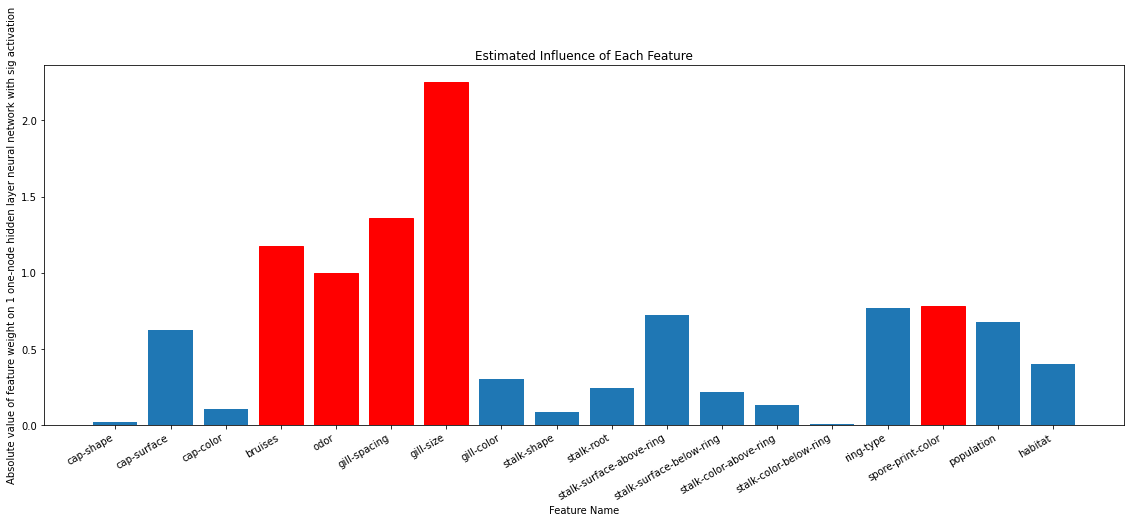

In [255]:
unsorted_x = feature_names
unsorted_y = np.abs(weights.reshape(weights.shape[0]))

plt.rcParams["figure.figsize"] = (15, 5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(unsorted_x,unsorted_y)
for index in range(5):
    ax.get_children()[int(result[-index-1][1])].set_color('r')

plt.title("Estimated Influence of Each Feature")
plt.xlabel('Feature Name')
plt.ylabel('Absolute value of feature weight on 1 one-node hidden layer neural network with sig activation')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

Now, we see that the top 5 influential weights. Let's see if we are able to use just these 5 features to construct a good enough model. 

In [256]:
X_new = data[accepted_filter].to_numpy()

#70% train, 30%test
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y,test_size=0.30,random_state=1)

#scaling x 
scaler = preprocessing.StandardScaler()
X_new_train= scaler.fit_transform(X_new_train)
X_new_test = scaler.transform(X_new_test)

In [258]:
for cell in range (1,21):
    tanh_nn = MLPClassifier(hidden_layer_sizes=(cell,),activation="relu",solver='adam',max_iter=1000)
    tanh_nn.fit(X_new_train,y_new_train)

    print(cell,"cells, acc=",tanh_nn.score(X_new_test,y_new_test))

1 cells, acc= 0.9532403609515997
2 cells, acc= 0.9532403609515997
3 cells, acc= 0.9708777686628384
4 cells, acc= 0.9938474159146842
5 cells, acc= 0.9987694831829368
6 cells, acc= 0.9987694831829368
7 cells, acc= 0.9987694831829368
8 cells, acc= 0.9987694831829368
9 cells, acc= 0.9987694831829368
10 cells, acc= 0.9987694831829368
11 cells, acc= 0.9987694831829368
12 cells, acc= 0.9987694831829368
13 cells, acc= 0.9987694831829368
14 cells, acc= 0.9987694831829368
15 cells, acc= 0.9987694831829368
16 cells, acc= 0.9987694831829368
17 cells, acc= 0.9987694831829368
18 cells, acc= 0.9987694831829368
19 cells, acc= 0.9987694831829368
20 cells, acc= 0.9987694831829368


Workable, but acc seems to not increase after 5 cells. Let's see what if we add another hidden layer on top? 

In [260]:
for cell in range (1,11):
    tanh_nn = MLPClassifier(hidden_layer_sizes=(10,cell),activation="relu",solver='adam',max_iter=1000)
    tanh_nn.fit(X_new_train,y_new_train)

    print(cell,"cells, acc=",tanh_nn.score(X_new_test,y_new_test))

1 cells, acc= 0.9684167350287121
2 cells, acc= 0.9987694831829368
3 cells, acc= 0.9987694831829368
4 cells, acc= 0.9228876127973749
5 cells, acc= 0.9343724364232978
6 cells, acc= 0.9987694831829368
7 cells, acc= 0.9987694831829368
8 cells, acc= 0.9987694831829368
9 cells, acc= 0.9987694831829368
10 cells, acc= 0.9987694831829368


We see that despite our best efforts, we are unable to improve the mean accuracy further than 0.9988 with only 5 features. Even though this is not the mean acc of 1 that we had with 20 features, it shall suffice.

In [262]:
print(accepted_filter)

['gill-size', 'gill-spacing', 'bruises', 'odor', 'spore-print-color']


In [263]:
X_new = data[accepted_filter].to_numpy()

#70% train, 30%test
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y,test_size=0.30,random_state=1)

#scaling x 
scaler = preprocessing.StandardScaler()
X_new_train= scaler.fit_transform(X_new_train)
X_new_test = scaler.transform(X_new_test)


nn = MLPClassifier(hidden_layer_sizes = (20,),activation="logistic",solver="adam",max_iter=1000)
nn.fit(X_new_train,y_new_train)

y_pred = nn.predict(X_new_test)
nn_score = nn.score(X_new_test,y_new_test)
y_pred_proba = nn.predict_proba(X_new_test)

print(nn_score)
print("w: ",one_nn.coefs_)
print("b: ",one_nn.intercepts_)

0.9987694831829368
w:  [array([[-0.01976555],
       [-0.62674155],
       [ 0.10534892],
       [-1.1732146 ],
       [ 0.99651587],
       [-1.35710939],
       [-2.24955266],
       [ 0.30165741],
       [ 0.08389777],
       [ 0.24684895],
       [ 0.72522106],
       [ 0.21897333],
       [-0.13139666],
       [ 0.00676014],
       [-0.77120596],
       [ 0.78226596],
       [-0.67511384],
       [-0.39969792]]), array([[2.45525831]])]
b:  [array([-0.6978953]), array([-1.084528])]
